Video Link: https://drive.google.com/file/d/1JmgZuAZKfCPkdGdAZ13lYRmRDfo6TEvn/view?usp=sharing

References:

https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python

https://stackoverflow.com/questions/24101524/finding-median-of-list-in-python

https://note.nkmk.me/en/python-opencv-pillow-image-size/

https://drive.google.com/file/d/1TDY6d2VvJ2A44Rke35BR3Wh1kx1GbKVj/view

https://drive.google.com/file/d/1aMtPshbschx0apV8YwOQtzek6VaqpPVf/view

https://drive.google.com/file/d/1STKK4w3wAbHNCkI9idvV5KgFfV6mcH0u/view


Importing our libraries for Use

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Reading the image from the dataset and cropping

Developer: Muhammad 19I-0561

Text(0.5, 1.0, 'Roll Number options')

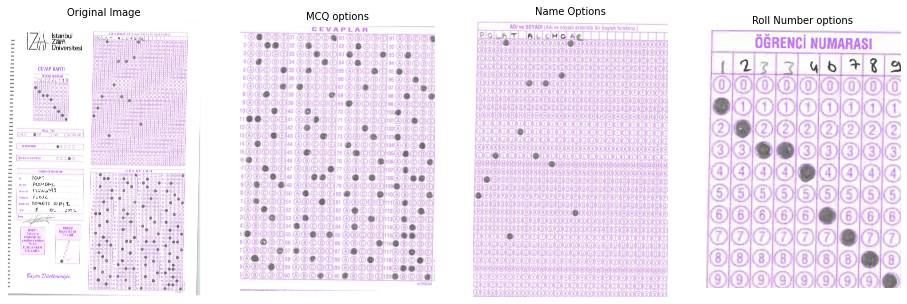

In [8]:
path = r"Dataset/unnamed (4).jpg"
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
# TODO : Reading the image again in coloured mode
img_color = cv2.imread(path,cv2.IMREAD_COLOR)
# TODO : Image cropping
img_color_MCQ = img_color[3770:7200, 2141:4500]
img_color_Name = img_color[258:3671, 2141:4544]
img_color_Roll = img_color[1342:2537, 657:1553]

# TODO : Now cropping the same images for grayscale

img_color_Name_gray = img[258:3671, 2141:4544]
img_color_Roll_gray = img[1342:2537, 657:1553]
img_color_MCQ_gray = img[3770:7200, 2141:4500]


# TODO : Displaying the images
fig, axs = plt.subplots(1,4,figsize=(16,16))

axs[0].imshow(img_color, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image',fontsize='medium')
axs[1].imshow(img_color_MCQ, cmap='gray')
axs[1].axis('off')
axs[1].set_title('MCQ options',fontsize='medium')
axs[2].imshow(img_color_Name, cmap='gray')
axs[2].axis('off')
axs[2].set_title('Name Options',fontsize='medium')
axs[3].imshow(img_color_Roll, cmap='gray')
axs[3].axis('off')
axs[3].set_title('Roll Number options',fontsize='medium')

Applying Contours and getting bounding rectangles

Developer: Mehmood Amjad 19I-0472

Text(0.5, 1.0, 'Morphological Processing')

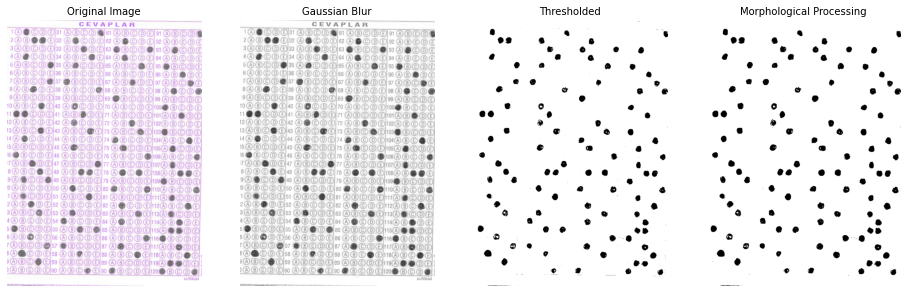

In [9]:
# TODO : Applying Gaussian Blue and thresholding to get desired results
img2 = cv2.GaussianBlur(img_color_MCQ_gray,(3,3),1,0)
thresh, out = cv2.threshold(img2,150,255,cv2.THRESH_BINARY)
# TODO : Applying dilation first since image not negative
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(out,kernel,iterations = 1)

# TODO : Applying erosion with a different kernel
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(dilation,kernel,iterations = 1)

# TODO : Displaying our image
fig, axs = plt.subplots(1,4,figsize=(16,16))

axs[0].imshow(img_color_MCQ, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image',fontsize='medium')
axs[1].imshow(img2, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Gaussian Blur',fontsize='medium')
axs[2].imshow(out, cmap='gray')
axs[2].axis('off')
axs[2].set_title('Thresholded',fontsize='medium')
axs[3].imshow(erosion, cmap='gray')
axs[3].axis('off')
axs[3].set_title('Morphological Processing',fontsize='medium')

Calculating the dimensions of each window and cropping image accordingly

Developer: Danyal Faheem 19I-2014 and Muhammad 19I-0561

You have selected  3


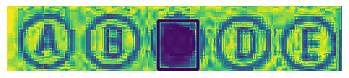

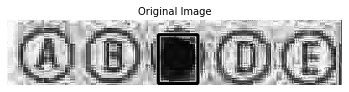

In [10]:
# TODO : Applying Gaussian Blue and thresholding to get desired results
img2 = cv2.GaussianBlur(img_color_MCQ_gray, (3, 3), 1, 0)
thresh, out = cv2.threshold(img2, 150, 255, cv2.THRESH_BINARY)
# TODO : Applying dilation first since image not negative
kernel = np.ones((3, 3), np.uint8)
dilation = cv2.dilate(out, kernel, iterations=1)

# TODO : Applying erosion with a different kernel
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(dilation, kernel, iterations=1)

# TODO : Function to calculate Median value of a list
def median(lst):
    sortedLst = sorted(lst)
    lstLen = len(lst)
    index = (lstLen - 1) // 2

    if (lstLen % 2):
        return sortedLst[index]
    else:
        return (sortedLst[index] + sortedLst[index + 1])/2.0


# TODO : Taking negative of our image to get the contours
erosion = erosion - 255

width = []
height = []

# TODO : Calculating contorus of our processed image
contours, hierarchy = cv2.findContours(
    erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# TODO : Calculating Bounding Rectangles and drawing them
for i in range(len(contours)):
    if (cv2.contourArea(contours[i]) > 0):
        x, y, w, h = cv2.boundingRect(contours[i])
        # TODO : Appending the width and height since we need them later
        width.append(w)
        height.append(h)
        cv2.rectangle(img_color_MCQ, (x, y), (x+w, y+h), (255, 0, 0), 4)

# TODO : Calculating the width of one row of MCQs
# TODO : One row of MCQs has 5 options, taking median of width of all and therefore creating one row width
row_width = (median(width) * 7) + (median(width) * 0.25)

# TODO : Calculating the height of one row of MCQs
# TODO : One row of MCQs has 1 options, taking median of height of all and therefore creating one row height
row_height = median(height) + (median(height) * 0.3)
rows = []


# TODO : Position detection of the circle and also check that only one option should be marked
img_height, img_width, colors = img_color_MCQ.shape
x = 78
y = 85

# TODO : An string to store the results of each option in, to be explained later
student_results = ""


def calculation(new_image):
    # Variable to hold the result 
    student_result = ""
    # Converting the Passed Image in to grey scale
    working_image = grayscale = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
    # Defining a sharpening kernel 
    kernel = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
    # Sharpen the image in order to detect contors efficiently 
    working_image = cv2.filter2D(src=working_image, ddepth=-1, kernel=kernel)
    # Defining constant for inverse log ( sharpe the image )
    c = 255 / np.log(1 + np.max(working_image))
    # Applying the Mask 
    working_image = np.exp(working_image**1/c) - 1
    # ROunding off all the intensity values of pixel
    working_image = np.array(working_image, dtype=np.uint8)
    # Extracting contours from the image ( Working image )
    contours, hierarchy = cv2.findContours(
        working_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Student result
    # If we get more than 2 countours break hint: there should be max two filled object if there is only one option selected
    if len(contours) >= 3:
        # If there are more than two option selected return -1 
        # Demo purpose 
        print("You have marked two opt")
        student_result += "-1,"
    else:
        # So far, We have the Question which has only one or may be no option selected 
        position = 0
        # A check : bool to see weather it is attempted or not 
        check = True
        # Loop on the counters detected by th open cv function
        for i in range(len(contours)):
            # If the contour area is in this range hint : min:max area of attempted circle
            if cv2.contourArea(contours[i]) > 3500 and cv2.contourArea(contours[i]) < 6000:
                index = i
                # Extracting the detected option moments to get the central value
                M = cv2.moments(contours[i])
                x = int(M["m10"] / M["m00"])
                y = int(M["m01"] / M["m00"])
                # In order to see the postion of that perticular circle do the following step 
                #   1. copy the x coordinate of detected filled circle
                #   2. loop towards right by adding space = box size of options 
                #   3. Counts the number of shifts before hitting the extreme ( start ) : x = 0
                #   4. Number of shifts will give you the exact position that can easily be checked from the key 
                looper = x
                # Loop until hit the extreme left of the image
                while looper > 0:
                    # row_width min looper 
                    looper -= 100 
                    # On every shift increase the postion variable 
                    position += 1
                    # storing the selected option to return 
                student_result += str(position)
                # We got the result thus False the check : bool
                check = False
        # If no contour found in that range, There is no option attempted 
        if check:
            # Demo purpose 
            print("you skipped this mcq")
            # Send back the error msg
            student_result += "-1,"
        else:
            # If we got the exact positing pop it on screen for better understanding: Demo purpose  
            print("You have selected ", position)
    # Show the extracted Image : Demo purpose 
    plt.imshow(working_image), plt.axis('off')
    fig, axs = plt.subplots(1, 1)
    axs.imshow(working_image, cmap='gray')
    axs.axis('off')
    axs.set_title('Original Image', fontsize='medium')
    return student_result


# Send coordinates of extracted row ( to be calculated)
x += 2*row_width + (row_width * 0.1)+100
y = 7*row_height+10
new_image = img_color_MCQ[int(y): int(
    y + row_height), int(x): int(x + row_width)]
# TODO : Calling our function and storing the return value of one row 
student_results += calculation(new_image)



Now applying the same on the Roll Number part

Developer: Danyal Faheem 19I-2014 and Muhammad 19I-0561

In [11]:
# TODO : Applying Gaussian Blue and thresholding to get desired results
img3 = cv2.GaussianBlur(img_color_Roll_gray, (3, 3), 1, 0)
thresh, out = cv2.threshold(img3, 150, 255, cv2.THRESH_BINARY)
# TODO : Applying dilation first since image not negative
kernel = np.ones((3, 3), np.uint8)
dilation = cv2.dilate(out, kernel, iterations=1)

# TODO : Applying erosion with a different kernel
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(dilation, kernel, iterations=1)

# TODO : Function to calculate Median value of a list
def median(lst):
    sortedLst = sorted(lst)
    lstLen = len(lst)
    index = (lstLen - 1) // 2

    if (lstLen % 2):
        return sortedLst[index]
    else:
        return (sortedLst[index] + sortedLst[index + 1])/2.0


# TODO : Taking negative of our image to get the contours
erosion = erosion - 255

width = []
height = []

# TODO : Calculating contorus of our processed image
contours, hierarchy = cv2.findContours(
    erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# TODO : Calculating Bounding Rectangles and drawing them
for i in range(len(contours)):
    if (cv2.contourArea(contours[i]) > 0):
        x, y, w, h = cv2.boundingRect(contours[i])
        # TODO : Appending the width and height since we need them later
        width.append(w)
        height.append(h)
        cv2.rectangle(img_color_Roll, (x, y), (x+w, y+h), (255, 0, 0), 4)

# TODO : Calculating the width of one row of MCQs
# TODO : Appending the width and height since we need them later
row_width = (median(width))

# TODO : Calculating the height of one row of MCQs
# TODO : One row of MCQs has 1 options, taking median of height of all and therefore creating one row height
row_height = (median(height) * 18) + (median(height) * 0.3)

rows = []

# TODO : Getting the resolution of our image
img_height, img_width, colors = img_color_Roll.shape
x = 30
y = 220
# # TODO : Running a loop to crop our rows according to row width and height
roll_number = []
iteration = 1
adder = 0
# print(img_width)
while x < img_width:
    # print(iteration, x)
    # exit()
    # TODO : Crop the image accordinly
    y = 220
    new_image = img_color_Roll[int(y): int(
        y + row_height+40), int(x): int(x + row_width+40)]
    working_image = grayscale = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
    # Defining a sharpening kernel 
    kernel = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
    # Sharpen the image in order to detect contors efficiently 
    working_image = cv2.filter2D(src=working_image, ddepth=-1, kernel=kernel)
    # Defining constant for inverse log ( sharpe the image )
    c = 255 / np.log(1 + np.max(working_image))
    # Applying the Mask 
    working_image = np.exp(working_image**1/c) - 1
    # ROunding off all the intensity values of pixel
    working_image = np.array(working_image, dtype=np.uint8)
    # Extracting contours from the image ( Working image )
    contours, hierarchy = cv2.findContours(
        working_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # TODO : If more than one filled circle, it is an error
    if len(contours) >= 3:
        roll_number.append(-1)
    # TODO : Loop through contours to get position of chosen circle
    else:
        position = 0
        check = True
        for i in range(len(contours)):
            if cv2.contourArea(contours[i]) > 3500 and cv2.contourArea(contours[i]) < 6000:
                index = i
                M = cv2.moments(contours[i])
                x = int(M["m10"] / M["m00"])
                y = int(M["m01"] / M["m00"])
                looper = y
                while looper > 0:
                    looper -= 100
                    position += 1
            check = False
    # TODO : If no option selected, then false option
    if check:
        roll_number.append(-1)
    # TODO : If option selected, then add that option value
    else:
        roll_number.append(position-1)
    # TODO : Here we have added some calculations to apply scaling to row width
    iteration += 1
    if iteration == 4 or iteration == 3:
        x = (iteration+iteration-1)*row_width + (row_width * 0.1)+30
    elif iteration >= 5 and iteration < 9:
        x = (iteration+iteration-1)*row_width + \
            (row_width * 0.1)+40+(20*adder)
        adder += 1
    elif iteration == 9:
        x = (iteration+iteration-1)*row_width + \
            (row_width * 0.1)+(40+(20*adder)-10)
    elif iteration == 10:
        break
    else:
        x += row_width + (row_width * 0.1)+40        
print("student roll number is: ",roll_number)

# TODO : At the end, we write all our data to our database
def Database(result, rollid):
    # TODO : We create a new file with a name of the roll number of the student
    file = open(rollid + ".txt", "w")
    # TODO : Write roll number and then options selected on next line
    file.write(rollid + "\n" + result[:len(result) - 1] + "\n")
rollid = ""
for x in roll_number:
    rollid += '' + str(x)
Database(student_results, rollid)

student roll number is:  [1, 2, 3, 3, 4, 6, 7, 8, 9]


Now Applying on the Name Part

In [16]:
# TODO : Applying Gaussian Blue and thresholding to get desired results
img3 = cv2.GaussianBlur(img_color_Name_gray, (3, 3), 1, 0)
thresh, out = cv2.threshold(img3, 150, 255, cv2.THRESH_BINARY)
# TODO : Applying dilation first since image not negative
kernel = np.ones((3, 3), np.uint8)
dilation = cv2.dilate(out, kernel, iterations=1)

# TODO : Applying erosion with a different kernel
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(dilation, kernel, iterations=1)

# TODO : Function to calculate Median value of a list
def median(lst):
    sortedLst = sorted(lst)
    lstLen = len(lst)
    index = (lstLen - 1) // 2

    if (lstLen % 2):
        return sortedLst[index]
    else:
        return (sortedLst[index] + sortedLst[index + 1])/2.0


# TODO : Taking negative of our image to get the contours
erosion = erosion - 255

width = []
height = []

# TODO : Calculating contorus of our processed image
contours, hierarchy = cv2.findContours(
    erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# TODO : Calculating Bounding Rectangles and drawing them
for i in range(len(contours)):
    if (cv2.contourArea(contours[i]) > 0):
        x, y, w, h = cv2.boundingRect(contours[i])
        # TODO : Appending the width and height since we need them later
        width.append(w)
        height.append(h)
        cv2.rectangle(img_color_Name, (x, y), (x+w, y+h), (255, 0, 0), 4)

# TODO : Calculating the width of one row of MCQs
# TODO : Appending the width and height since we need them later
row_width = (median(width))

# TODO : Calculating the height of one row of MCQs
# TODO : One row of MCQs has 1 options, taking median of height of all and therefore creating one row height
row_height = (median(height) * 350) + (median(height) * 0.3)

rows = []

# TODO : Getting the resolution of our image
img_height, img_width, colors = img_color_Name.shape
x = 20
y = 20
# # TODO : Running a loop to crop our rows according to row width and height
Name = []
iteration = 1
adder = 0
# print(img_width)
while x < img_width:
    # TODO : Crop the image accordinly
    y = 220
    new_image = img_color_Name[int(y): int(
        y + row_height+40), int(x): int(x + row_width+40)]
    plt.imshow(new_image), plt.axis('off')
    fig, axs = plt.subplots(1, 1)
    axs.imshow(working_image, cmap='gray')
    axs.axis('off')
    working_image = grayscale = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
    # Defining a sharpening kernel 
    kernel = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
    # Sharpen the image in order to detect contors efficiently 
    working_image = cv2.filter2D(src=working_image, ddepth=-1, kernel=kernel)
    # Defining constant for inverse log ( sharpe the image )
    c = 255 / np.log(1 + np.max(working_image))
    # Applying the Mask 
    working_image = np.exp(working_image**1/c) - 1
    # ROunding off all the intensity values of pixel
    working_image = np.array(working_image, dtype=np.uint8)
    # Extracting contours from the image ( Working image )
    contours, hierarchy = cv2.findContours(
        working_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # TODO : If more than one filled circle, it is an error
    if len(contours) >= 3:
        Name.append(-1)
    # TODO : Loop through contours to get position of chosen circle
    else:
        position = 0
        check = True
        for i in range(len(contours)):
            if cv2.contourArea(contours[i]) > 3500 and cv2.contourArea(contours[i]) < 6000:
                index = i
                M = cv2.moments(contours[i])
                x = int(M["m10"] / M["m00"])
                y = int(M["m01"] / M["m00"])
                looper = y
                while looper > 0:
                    looper -= 100
                    position += 1
            check = False
    # TODO : If no option selected, then false option
    if check:
        Name.append(-1)
    # TODO : If option selected, then add that option value
    else:
        Name.append(position-1)
    # TODO : Here we have added some calculations to apply scaling to row width
    iteration += 1
    if iteration == 4 or iteration == 3:
        x = (iteration+iteration-1)*row_width + (row_width * 0.1)+30
    elif iteration >= 5 and iteration < 9:
        x = (iteration+iteration-1)*row_width + \
            (row_width * 0.1)+40+(20*adder)
        adder += 1
    elif iteration == 9:
        x = (iteration+iteration-1)*row_width + \
            (row_width * 0.1)+(40+(20*adder)-10)
    elif iteration == 10:
        break
    else:
        x += row_width + (row_width * 0.1)+40        
print("student Name is: ",Name)

# TODO : At the end, we write all our data to our database
def Database1(result, rollid, name):
    # TODO : We create a new file with a name of the roll number of the student
    file = open(rollid + ".txt", "w")
    # TODO : Write name then roll number on next line and then options selected on next line
    file.write(rollid + "\n" + result[:len(result) - 1] + "\n")
name = ""
for x in Name:
    name += '' + str(x)
Database1(student_results, rollid, name)

student Name is:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
